In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')

X, y = df.iloc[:, 1:].values, df.iloc[:, 12].values

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_vals.sort()
eigen_vals = eigen_vals[::-1]

tot = sum(eigen_vals)
var_exp = [(eigen_val / tot) for eigen_val in eigen_vals]
cum_var_exp = np.cumsum(var_exp)

accuracy = [None] * 6

eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# use first 4 PCs, cum_var_exp[3] = ~50%
# Approx. estimation of variance per PC: [0.16432626 0.29925805 0.40793221 0.50592528 0.59138561 0.67564563
# 0.75141767 0.81604442 0.87340714 0.92629975 0.96891335 1.]
# 50% = 4 PC, 60% = 5 PC, 70% = 6 PC, 80% = 8 PC, 90% = 10 PC, 100% = 12 PC

# 50%
fifty = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                     eigen_pairs[1][1][:, np.newaxis],
                     eigen_pairs[2][1][:, np.newaxis],
                     eigen_pairs[3][1][:, np.newaxis]))
# 60%
sixty = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                     eigen_pairs[1][1][:, np.newaxis],
                     eigen_pairs[2][1][:, np.newaxis],
                     eigen_pairs[3][1][:, np.newaxis],
                     eigen_pairs[4][1][:, np.newaxis]))
# 70%
seventy = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                    eigen_pairs[1][1][:, np.newaxis],
                    eigen_pairs[2][1][:, np.newaxis],
                    eigen_pairs[3][1][:, np.newaxis],
                    eigen_pairs[4][1][:, np.newaxis],
                    eigen_pairs[5][1][:, np.newaxis]))
# 80%
eighty = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                      eigen_pairs[1][1][:, np.newaxis],
                      eigen_pairs[2][1][:, np.newaxis],
                      eigen_pairs[3][1][:, np.newaxis],
                      eigen_pairs[4][1][:, np.newaxis],
                      eigen_pairs[5][1][:, np.newaxis],
                      eigen_pairs[6][1][:, np.newaxis],
                      eigen_pairs[7][1][:, np.newaxis]))
# 90%
ninety = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                    eigen_pairs[1][1][:, np.newaxis],
                    eigen_pairs[2][1][:, np.newaxis],
                    eigen_pairs[3][1][:, np.newaxis],
                    eigen_pairs[4][1][:, np.newaxis],
                    eigen_pairs[5][1][:, np.newaxis],
                    eigen_pairs[6][1][:, np.newaxis],
                    eigen_pairs[7][1][:, np.newaxis],
                    eigen_pairs[8][1][:, np.newaxis],
                    eigen_pairs[9][1][:, np.newaxis]))
# 100%
hundred = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                    eigen_pairs[1][1][:, np.newaxis],
                    eigen_pairs[2][1][:, np.newaxis],
                    eigen_pairs[3][1][:, np.newaxis],
                    eigen_pairs[4][1][:, np.newaxis],
                    eigen_pairs[5][1][:, np.newaxis],
                    eigen_pairs[6][1][:, np.newaxis],
                    eigen_pairs[7][1][:, np.newaxis],
                    eigen_pairs[8][1][:, np.newaxis],
                    eigen_pairs[9][1][:, np.newaxis],
                    eigen_pairs[10][1][:, np.newaxis],
                    eigen_pairs[11][1][:, np.newaxis]))

percents = [fifty, sixty, seventy, eighty, ninety, hundred]
lr = LogisticRegression()

for i in range(len(percents)):
    X_train_pca = X_train_std.dot(percents[i])
    X_test_pca = X_test_std.dot(percents[i])
    lr = lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    accuracy[i-1] = accuracy_score(y_pred, y_test)
    
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


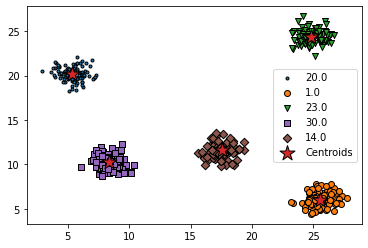

In [132]:
from random import randint
import itertools

df = pd.read_csv('as3_2.txt', sep = '\t', encoding = 'utf-8')
df.columns = ['X', 'Y', 'Label']
point = df.iloc[0, :]

points = [None] * len(df)

# create list of centroids given by data
for i in range(len(df)):
    points[i] = df.iloc[i, :]

def euclidean2D(point1, point2):
    x1 = point1[0] 
    x2 = point2[0] 
    y1 = point1[1] 
    y2 = point2[1] 
     
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2) 

centroids = []

def myInit(k):
    max_dist_seen_idx = randint(0, len(points))
    # pick k initial centroids
    while k > 0:
        # remove picked centroid from list of available points in dataset
        random = points.pop(max_dist_seen_idx)
        # add picked centroid to list of k centroids
        centroids.append(random)
        distances = [None] * len(points)
        # for each point, find distance to nearest centroid from list of centroids
        for idx, point in enumerate(points):
            min_dist_to_nearest = float('inf')
            for centroid in centroids:
                cur_dist = euclidean2D(point, centroid)
                if cur_dist < min_dist_to_nearest:
                    min_dist_to_nearest = cur_dist
#                 min_dist_to_nearest = min(min_dist_to_nearest, euclidean2D(point, centroid))
            distances[idx] = min_dist_to_nearest
        # pick point with largest distance to nearest centroids
        max_dist_seen = float('-inf')
        for idx, distance in enumerate(distances):
            if distance > max_dist_seen:
                max_dist_seen = distance
                max_dist_seen_idx = idx
        k -= 1    
    return

# assign each point the label of its nearest centroid
def myAssign():
    # for each point, find its nearest centroid
    for point in points:
        # initialize nearest centroid to first centroid in list
        nearest_centroid = centroids[0]
        min_dist_to_nearest = float('inf')
        # find closest centroid
        for centroid in centroids:
            cur_dist = euclidean2D(point, centroid)
            if cur_dist < min_dist_to_nearest:
                min_dist_to_nearest = cur_dist
                nearest_centroid = centroid
        # change label of current point to label of its nearest centroid
        point.iloc[2] = nearest_centroid.iloc[2]
    return

# calculate centroid for each unique label
def myCentroid(cur_centroid):
    label = cur_centroid[2]
    # find cluster of points with same labels -> cluster belongs to same centroid
    start = end  = 0
    while points[start].iloc[2] != label and start < len(points):
        start += 1
        end += 1
    while points[start].iloc[2] == points[end].iloc[2]:
        end += 1  
    cluster = pd.DataFrame(points[start:end])
    # find mean X and y for points with same label
    X_mean = np.mean(cluster.iloc[:, 0])
    y_mean = np.mean(cluster.iloc[:, 1])
    # return new centroid
    return X_mean, y_mean
# move centroid to newly calculated coordinates
def myUpdateCentroid(X_coord, Y_coord, centroid):
    centroid.iloc[0] = X_coord
    centroid.iloc[1] = Y_coord
    return
def myKmeansPlusPlus(k, myTol, myMax):
    myInit(k)
    count = 0
    optimized = True
    prev_centroids = [None] * len(centroids)
    while count < myMax:
        myAssign()
        for i in range(len(centroids)):
            cur_centroid = centroids[i]
            new_X, new_Y = myCentroid(cur_centroid)
            prev_centroids[i] = cur_centroid.copy()
            myUpdateCentroid(new_X, new_Y, cur_centroid)
            if np.sum((euclidean2D(cur_centroid, prev_centroids[i])) / cur_centroid * 100.0) > myTol:
                optimized = False
        if optimized:
            break
        count+=1
    labels = []
    for centroid in centroids:
        labels.append(centroid.iloc[2])
    return labels
def myPlot(labels):
    markers = itertools.cycle(('.', 'o', 'v', 's', 'D', '8'))
    colors = itertools.cycle(('#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'))
    for lab in labels:
        start = end  = 0
        while points[start].iloc[2] != lab and start < len(points):
            start += 1
            end += 1
        while points[start].iloc[2] == points[end].iloc[2]:
            end += 1  
        cluster = pd.DataFrame(points[start:end])
#         print(cluster[0])
        plt.scatter(cluster.iloc[:, 0], cluster.iloc[:, 1], color = next(colors), marker = next(markers), edgecolor = 'black', label = lab)
    final_centroids = pd.DataFrame(centroids[:])
    plt.scatter(final_centroids.iloc[:, 0], final_centroids.iloc[:, 1], color = '#d62728', s = 250, marker = '*', edgecolor = 'black', label = 'Centroids' )
#     for centroid in centroids:
#         plt.scatter(centroid.iloc[0], centroid.iloc[1], color = '#d62728', s = 250, marker = '*', edgecolor = 'black', label = 'Centroids')
#     plt.legend()
    plt.legend()
    plt.show()
    return
labels = myKmeansPlusPlus(5, 0.001, 300)
myPlot(labels)

In [133]:

def getLabel():
    labels = np.genfromtxt('as3_3.csv', delimiter=',', usecols=(2))
    return labels

def getData():
    data = np.genfromtxt('as3_3.csv', delimiter=',', usecols=(0, 1))
    return data
def getDBSCAN():
    return
def getAccuracy():
    return
def plotDBSCAN():
    return

print(getLabel())
print(getData())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.